In [69]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [70]:
#re-size all images 
IMAGE_SIZE=[224,224] #ResNet50 requires 224,224 image
train_path=r'C:\Users\HP\Cotton Disease Project\train'
valid_path=r'C:\Users\HP\Cotton Disease Project\val'

In [28]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False) #uses ImageNet weights

In [71]:
#don't train existing weights
for layer in resnet.layers:
    layer.trainable=False            #this makes sure that the layers are not trained. instead the weights are reused from ResNet50

In [72]:
folders=glob(r'C:\Users\HP\Cotton Disease Project\train\*')

In [73]:
x=Flatten()(resnet.output) #This line creates a flattened version of the output from the ResNet model and assigns it to the variable x.

In [74]:
len(folders)

4

In [75]:
prediction=Dense(len(folders),activation='softmax')(x) #Dense creates a fully connected layer object, applied to the output x, which is obtained from flatten above

In [76]:
model=Model(inputs=resnet.input,outputs=prediction)

In [46]:
#structure of the model
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [47]:
#loss function and optimizer
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [79]:
#Data augmentation is done for better generalization to unknown data. It need not be done for test data since test data must be
#and unmodified
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True
                                )
test_datagen=ImageDataGenerator(rescale=1./255)

In [80]:
training_set=train_datagen.flow_from_directory(r'C:\Users\HP\Cotton Disease Project\train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(r'C:\Users\HP\Cotton Disease Project\test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [56]:
# Monitor a few batches to ensure data is loaded correctly
x_batch, y_batch = next(training_set)
print("Training batch shape:", x_batch.shape)
print("Training labels shape:", y_batch.shape)

x_batch_val, y_batch_val = next(test_set)
print("Validation batch shape:", x_batch_val.shape)
print("Validation labels shape:", y_batch_val.shape)

Training batch shape: (32, 224, 224, 3)
Training labels shape: (32, 4)
Validation batch shape: (18, 224, 224, 3)
Validation labels shape: (18, 4)


In [58]:
r=model.fit(
        training_set,
        validation_data=test_set,
        epochs=20,
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set),
        verbose=1
)

Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7554 - loss: 0.6685 - val_accuracy: 0.8333 - val_loss: 0.5697
Epoch 2/20


C:\Users\HP\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7417 - loss: 0.7048 - val_accuracy: 0.7222 - val_loss: 0.6740
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.7574 - loss: 0.6472 - val_accuracy: 0.7778 - val_loss: 0.5360
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7391 - loss: 0.7529 - val_accuracy: 0.8333 - val_loss: 0.5741
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.

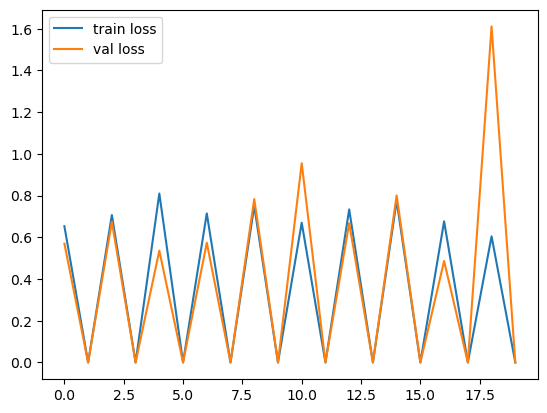

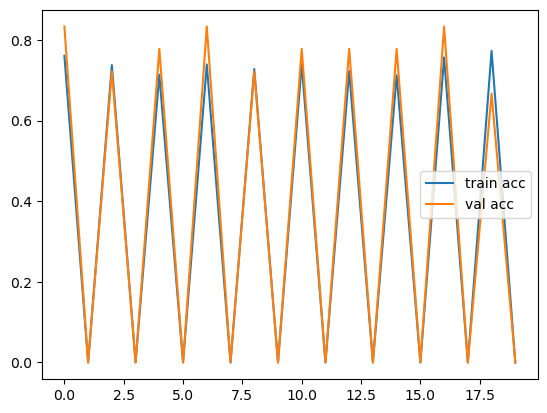

<Figure size 640x480 with 0 Axes>

In [84]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [87]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [88]:
y_pred = model.predict(test_set)

C:\Users\HP\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


In [89]:
y_pred

array([[0.14381401, 0.84459656, 0.00210183, 0.00948759],
       [0.15483834, 0.8347648 , 0.0020377 , 0.00835917],
       [0.1449784 , 0.84506375, 0.00186572, 0.0080922 ],
       [0.14280675, 0.84722954, 0.00198818, 0.00797553],
       [0.15913892, 0.83063626, 0.00192246, 0.0083024 ],
       [0.1385703 , 0.85206974, 0.00184176, 0.00751818],
       [0.11903448, 0.872428  , 0.00170492, 0.00683258],
       [0.14000623, 0.84859085, 0.00198524, 0.00941768],
       [0.12528162, 0.86608076, 0.00161218, 0.00702538],
       [0.13719359, 0.85403895, 0.00152811, 0.0072394 ],
       [0.13857043, 0.85103834, 0.0019651 , 0.00842618],
       [0.15033118, 0.8391676 , 0.00194443, 0.0085568 ],
       [0.1378215 , 0.8533779 , 0.00169124, 0.00710945],
       [0.11656141, 0.8758775 , 0.00151216, 0.00604897],
       [0.18593772, 0.8044046 , 0.00176658, 0.00789108],
       [0.18883482, 0.7972787 , 0.00226872, 0.01161781],
       [0.16089885, 0.83011454, 0.0018166 , 0.00717003],
       [0.1842859 , 0.8059926 ,

In [90]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [91]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)